### Problem Statement

Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected **2013 sales data for 1559 products** across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Data Dictionary

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

#### Train file: CSV containing the item outlet information with sales value

* Variable Description
* Item_Identifier Unique product ID
* Item_Weight Weight of product
* Item_Fat_Content Whether the product is low fat or not
* Item_Visibility The % of total display area of all products in a store allocated to the particular product
* Item_Type The category to which the product belongs
* Item_MRP Maximum Retail Price (list price) of the product
* Outlet_Identifier Unique store ID
* Outlet_Establishment_Year The year in which store was established
* Outlet_Size The size of the store in terms of ground area covered
* Outlet_Location_Type The type of city in which the store is located
* Outlet_Type Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales Sales of the product in the particular store. This is the outcome variable to be predicted.

#### Test file: CSV containing item outlet combinations for which sales need to be forecasted

* Variable Description
* Item_Identifier Unique product ID
* Item_Weight Weight of product
* Item_Fat_Content Whether the product is low fat or not
* Item_Visibility The % of total display area of all products in a store allocated to the particular product
* Item_Type The category to which the product belongs
* Item_MRP Maximum Retail Price (list price) of the product
* Outlet_Identifier Unique store ID
* Outlet_Establishment_Year The year in which store was established
* Outlet_Size The size of the store in terms of ground area covered
* Outlet_Location_Type The type of city in which the store is located
* Outlet_Type Whether the outlet is just a grocery store or some sort of supermarket

#### Submission file format

* Variable Description
* Item_Identifier Unique product ID
* Outlet_Identifier Unique store ID
* Item_Outlet_Sales Sales of the product in the particular store. This is the outcome variable to be predicted.

In [2]:
# Imported Libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# to suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split :
from sklearn.model_selection import train_test_split

# 'metrics' from sklearn is used for evaluating the model performance :
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection :
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression :
from sklearn.linear_model import LinearRegression

#Plotting Parameters :
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# Import the Dataset :

train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [4]:
# Check the Dimensions of the data :

train.shape, test.shape 
# Test columns will always have n-1 columns

((8523, 12), (5681, 11))

#### Exploratory Data Analysis

1. Univariate Analysis
2. Bivariate Analysis

In [5]:
train.head()

# Item Visibility has 0s which is incorrect....

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


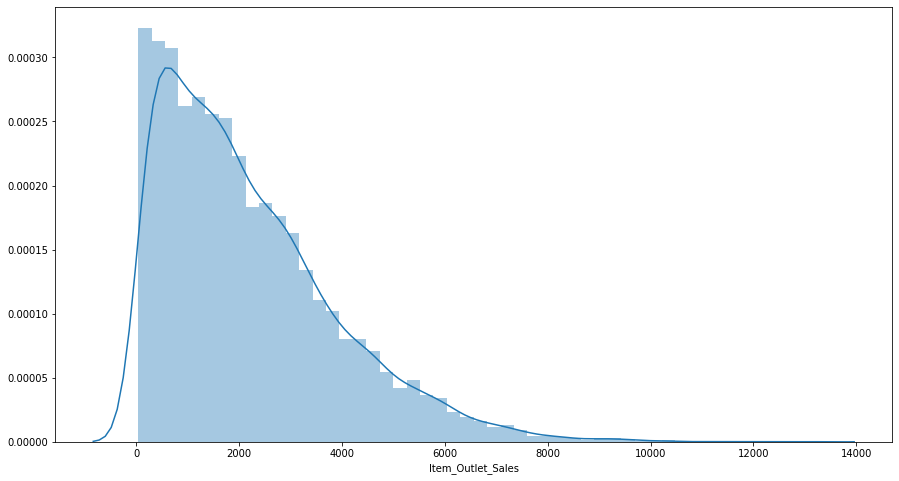

In [6]:
# Target Variable :

sns.distplot(train.Item_Outlet_Sales)

In [7]:
# Summary statistic of target variable :

train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### First Submission - Base Model

Average

In [8]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [9]:
# Submission File

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})

In [10]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [11]:
# Export it into csv
solution.to_csv("Basemodel.csv",index = False) # name of the file with ext and index = False

### Base Model RMSE: 1773.8

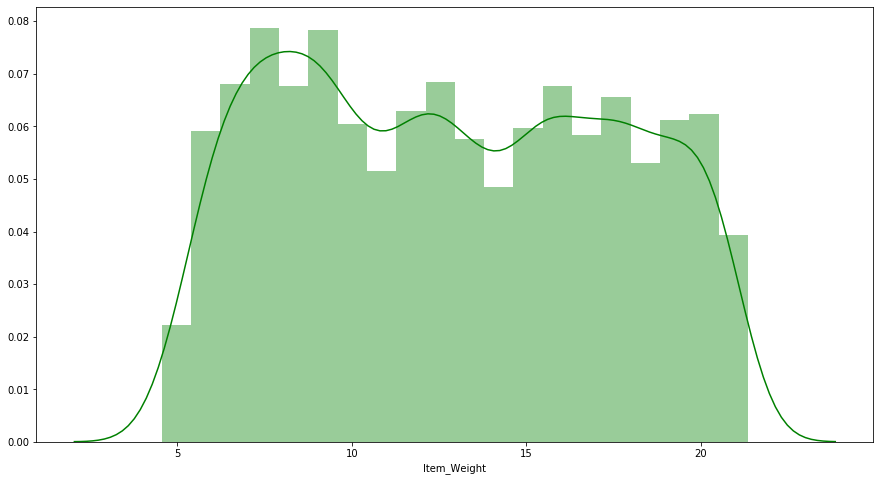

In [12]:
# Item_Weight :
sns.distplot(train.Item_Weight.dropna(), color ="g")

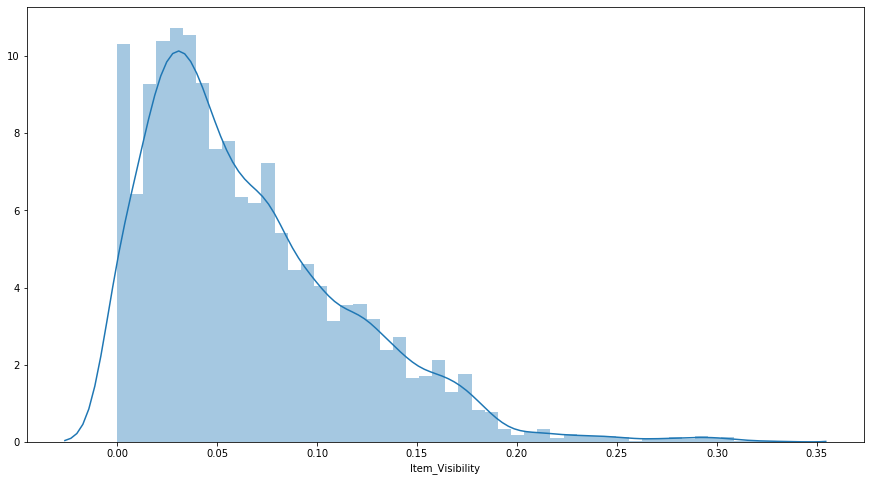

In [13]:
# Item Visibility :

sns.distplot(train.Item_Visibility)

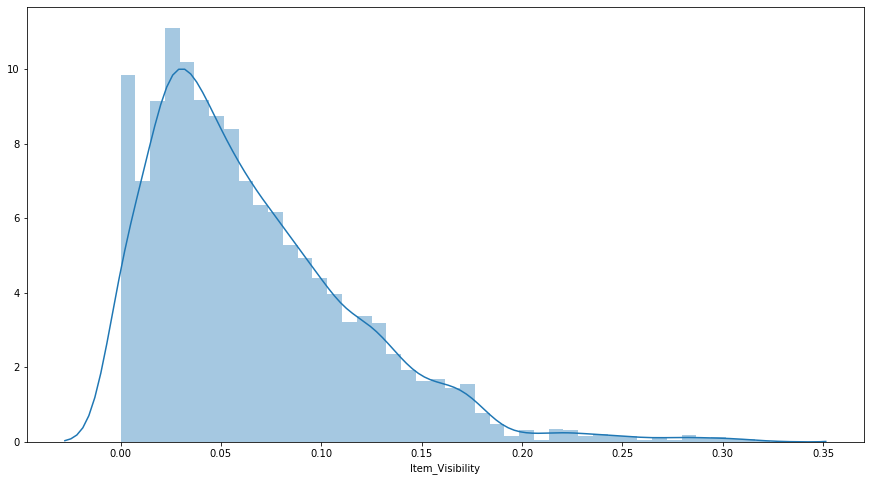

In [14]:
sns.distplot(test.Item_Visibility)

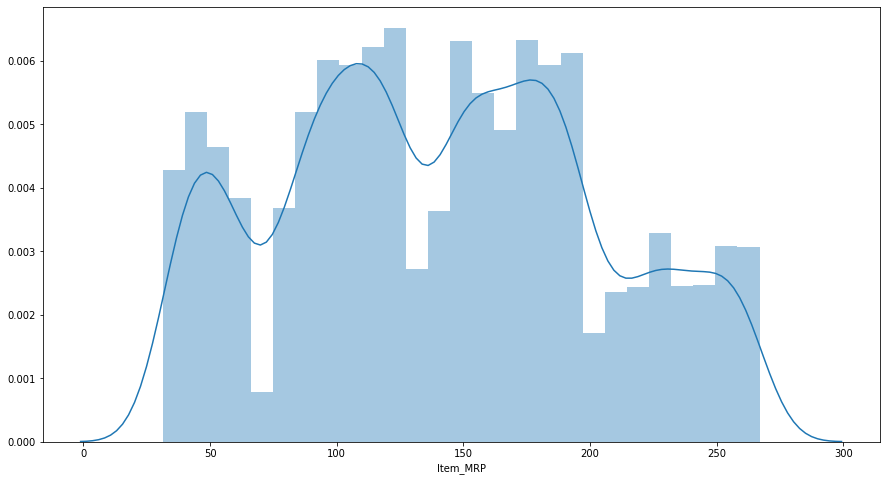

In [15]:
#Item MRP :

sns.distplot(train.Item_MRP)

Inference -  ITEM_MRP has different data distribution. We will use Bivariate analysis to understand this further

In [16]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
# Single Category - Sns.countplot | value_counts and then plotting the frequency :

test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [18]:
# Fixing the Item Fat Content :

test.Item_Fat_Content.replace(to_replace=["reg", "LF", "low fat"], 
                              value =["Regular", "Low Fat", "Low Fat"], inplace = True)

In [19]:
# Fixing the Item Fat Content :

train.Item_Fat_Content.replace(to_replace=["reg", "LF", "low fat"], 
                              value =["Regular", "Low Fat", "Low Fat"], inplace = True)

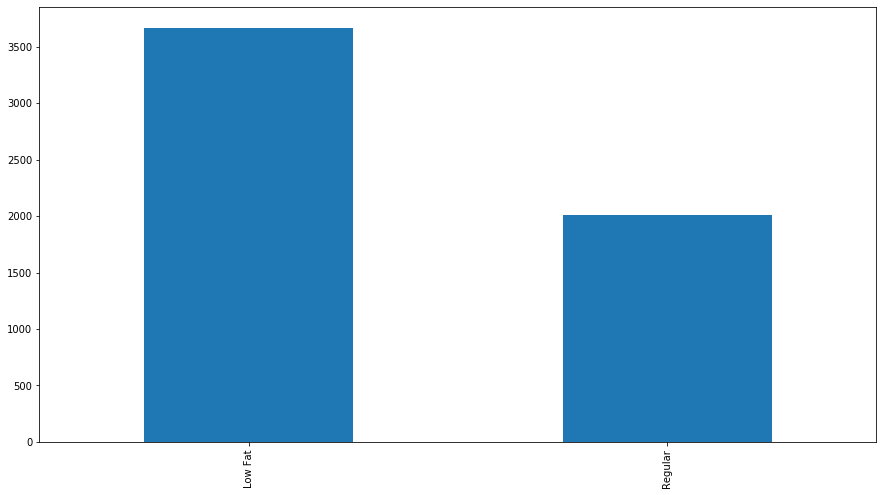

In [20]:
test.Item_Fat_Content.value_counts().plot(kind = "bar")

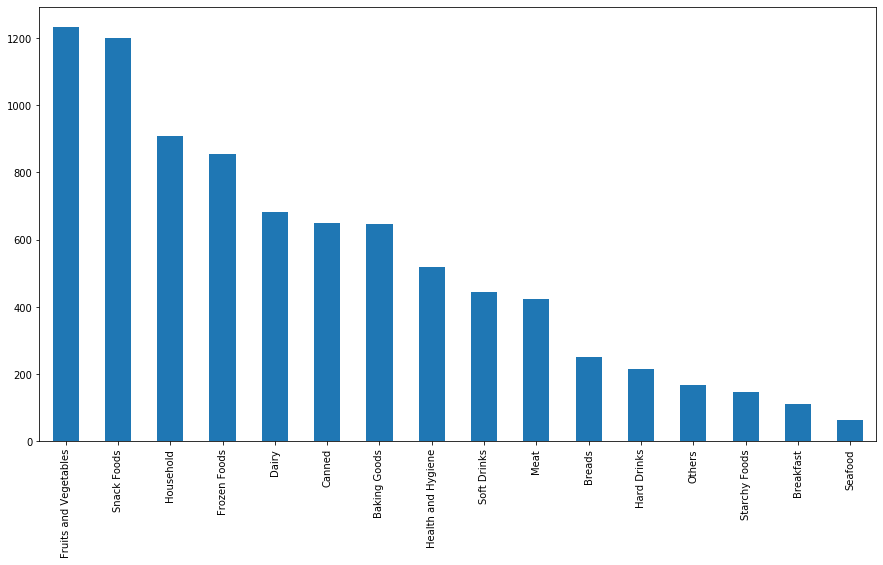

In [21]:
# Item Type

train.Item_Type.value_counts().plot(kind = "bar")

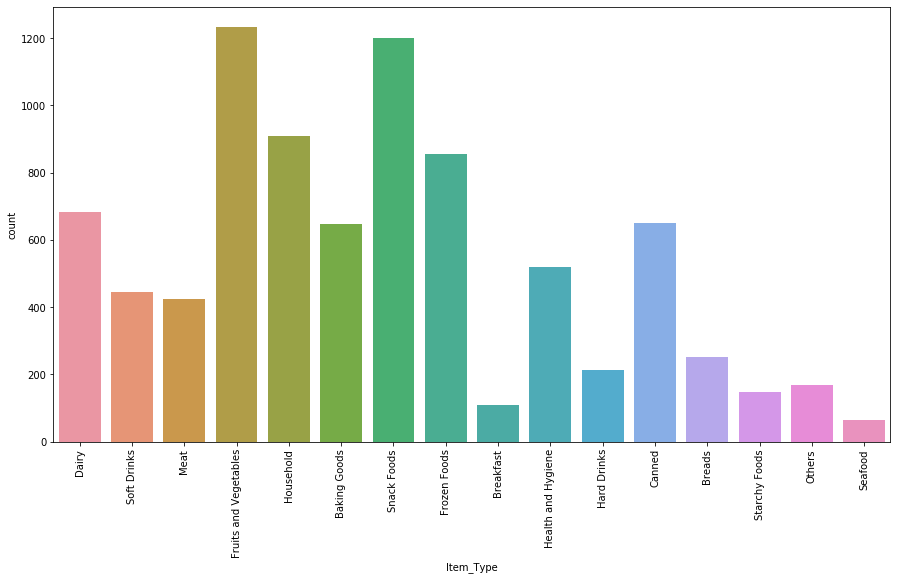

In [22]:
sns.countplot(train.Item_Type)
plt.xticks(rotation = 90)
plt.show()

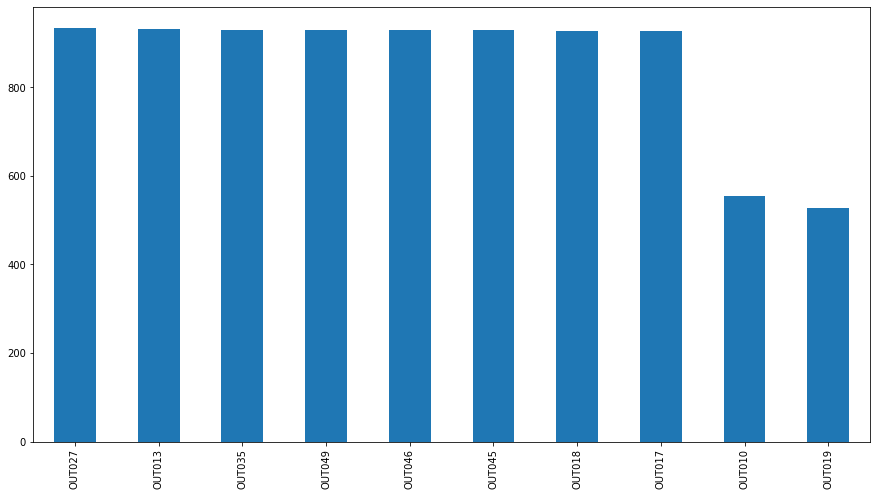

In [23]:
# Outlet ID :
 
train.Outlet_Identifier.value_counts().plot(kind = "bar")

# Out027 has the highest frequency - Sale will also be higher for this outlet..
# Out010 and Out019 account for the lowest sales..

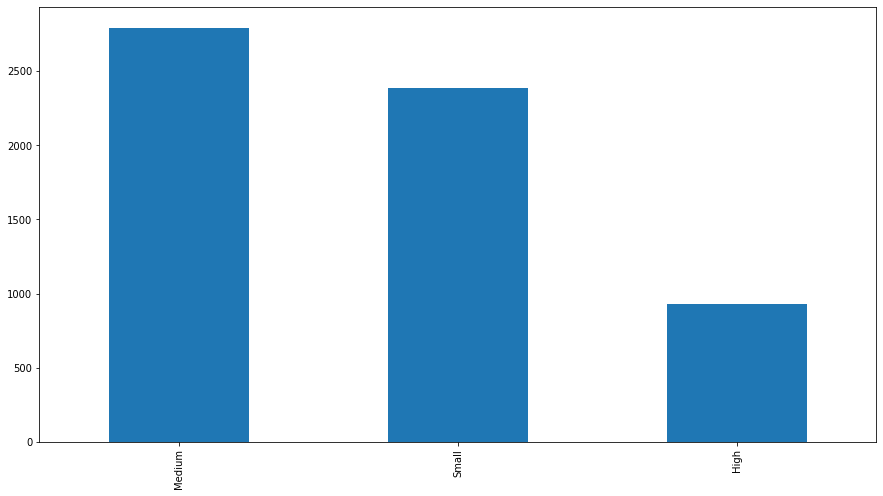

In [24]:
# Outlet Size :

train.Outlet_Size.value_counts().plot(kind = "bar")

# Out027 is the medium size outlet...

In [25]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Summary of Univariate Analysis

* Mean Sales is 2100 dollars and the min and max are 33 and 13000 resp.
* Product Types - Low Fat and Regular
* Top 3 Selling Items - **Fruits and Veggies, Snack Foods and Household Items**
* The Outlet readily available is **Out027**
* Most of the Outlets are **Medium** sized outlet.
* **Tier 3** Location has the highest no of Outlets.
* **S1** is the most seen Outlet Type


### Bivariate Analysis

* Num vs Num ( Pred vs TGT)
* Cat vs Num (Cat vs TGT)

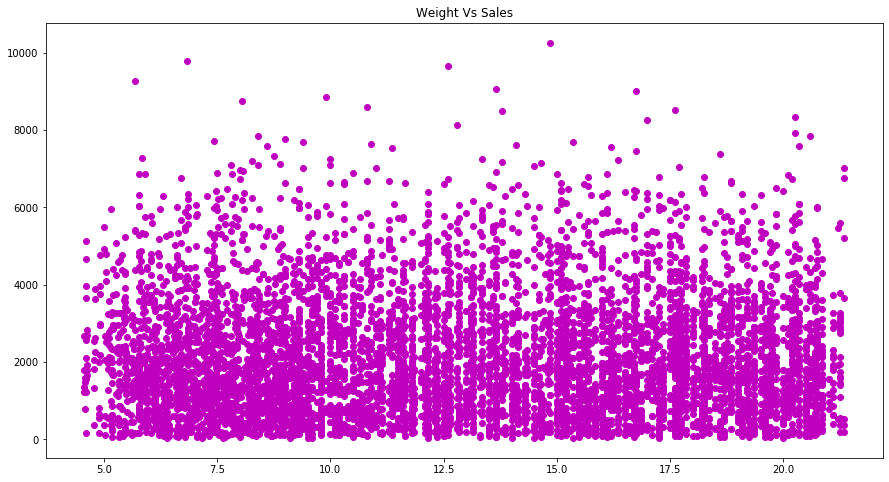

In [26]:
# Item_Weight Vs Sales :

plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, c = "m")
plt.title("Weight Vs Sales")
plt.show()

# Inference -  No pattern between the weight and sales

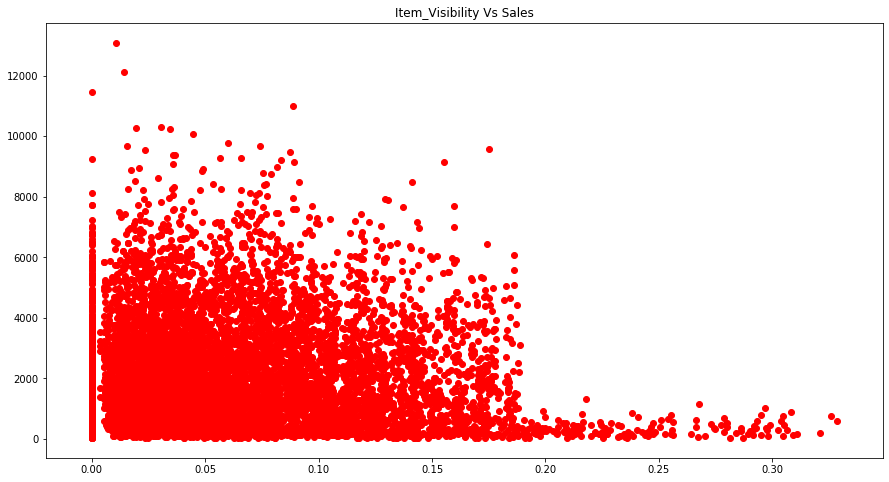

In [27]:
# Item_Visibility Vs Sales :

plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, c = "r")
plt.title("Item_Visibility Vs Sales")
plt.show()

# Inference - Bigger the products, lesser the sales
# A Straight Line on 0 that needs fixing...

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

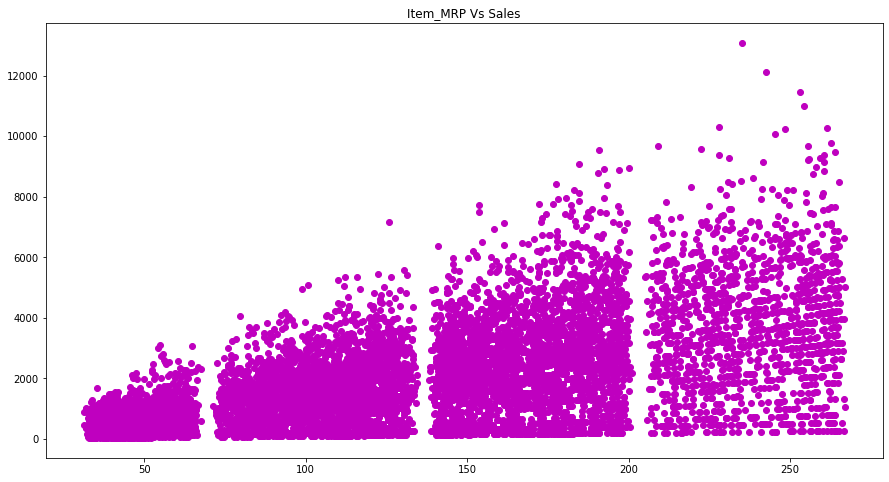

In [29]:
# Item_MRP Vs Sales :

plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, c = "m")
plt.title("Item_MRP Vs Sales")
plt.show()

# Inference - Bigger the products, lesser the sales
# A Straight Line on 0 that needs fixing...

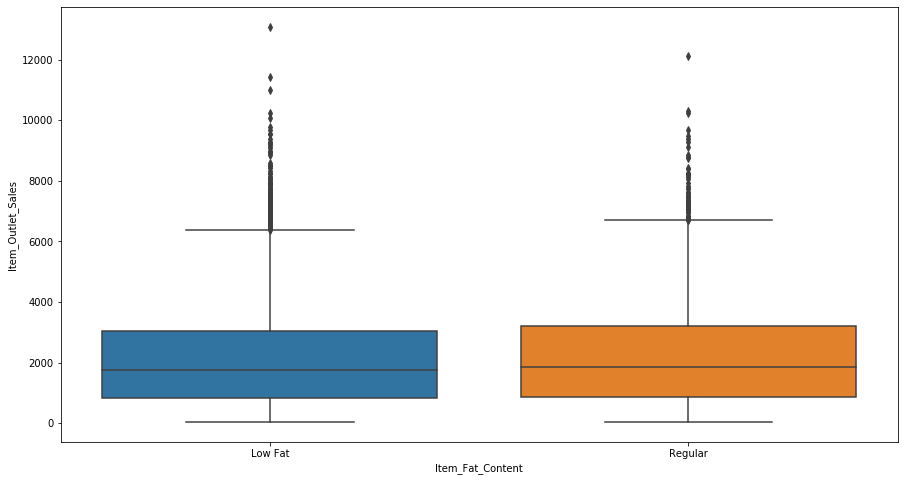

In [30]:
# Cat vs Numerical - boxplot
# Item Fat Content vs Sales

sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = train)

In [31]:
# Statistical Summary of the boxplot above :

train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


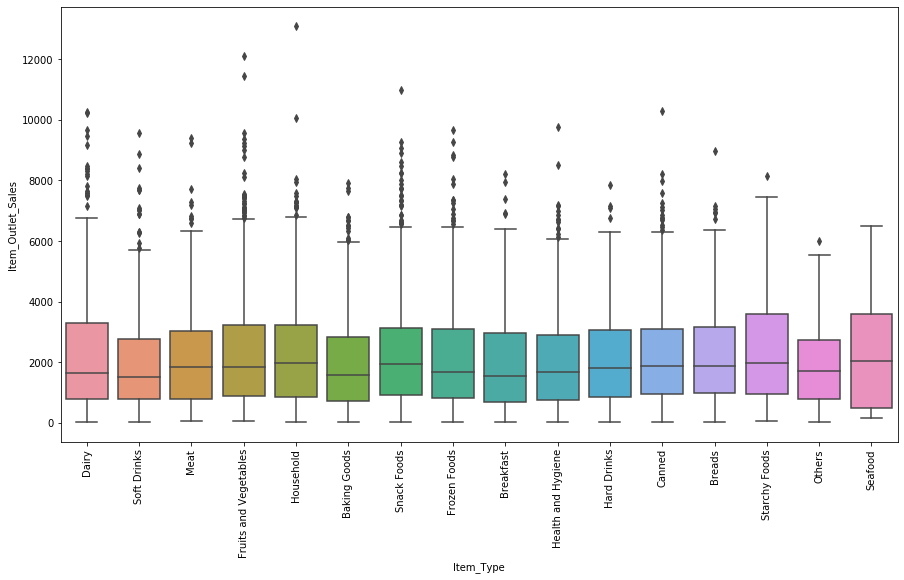

In [32]:
# Item Type vs Sales :

sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: Fast Moving Prods - Fruits and Veggies, Dairy, Household, Snack Food, Soft Drinks..

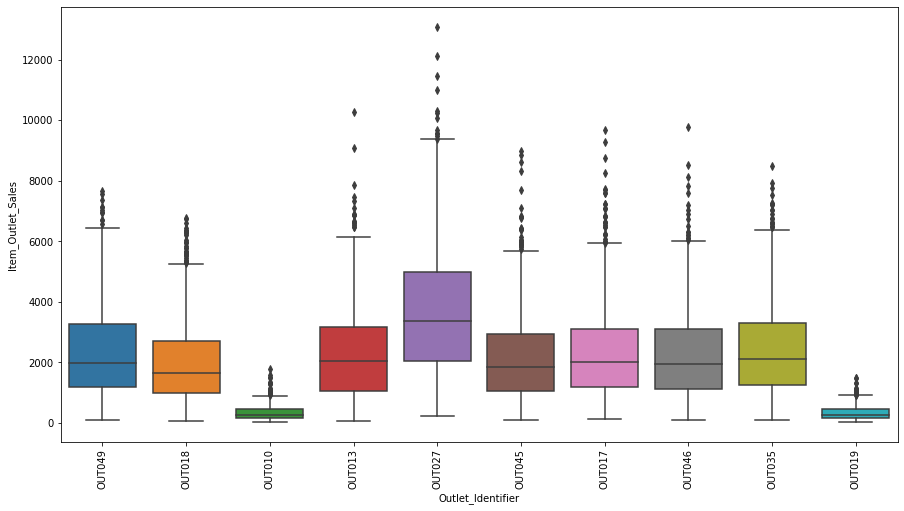

In [33]:
# Outlet ID vs Sales :

sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: Out027 and Out013 accounts for High Sales and Out010 & Out019 - Lowest Sales

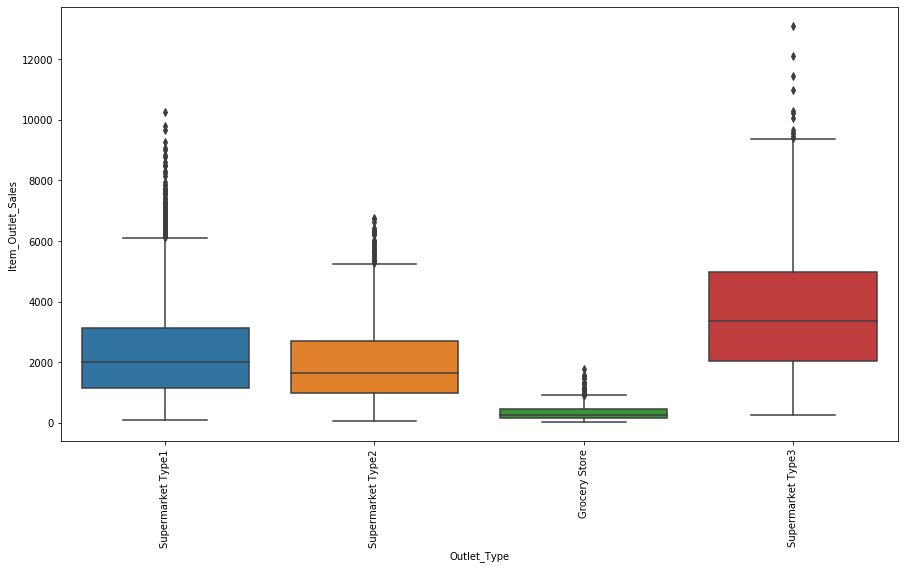

In [35]:
# Outlet Type vs Sales :

sns.boxplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: S3 followed by S1 accounts for High Sales

### Summary of Bivariate Analysis

* Low Fat Items sell more than Regular
* No pattern was found between weight and TGT
* We saw interesting pattern between visibility & TGT
* We also saw that there is a straight line at 0 in visibility plot which needs fixing.
* OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers
* S1 and S3 makes lot of money for the business.
* Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...



### Missing Values

In [36]:
train.isnull().sum()

# Item_Weight & Outlet Size same columns for both train and test

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
# Combine Train and Test :

combined = pd.concat([train, test], ignore_index = True)

In [38]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [39]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
combined.loc[combined.Item_Type=="Dairy", "Item_Weight"].mean()

13.23835812964935

In [41]:
combined.loc[combined.Item_Identifier=="NCD19", "Item_Weight"]

4        8.93
522      8.93
802      8.93
2129     8.93
2907     8.93
3428     8.93
8672      NaN
10467    8.93
13900    8.93
Name: Item_Weight, dtype: float64

In [42]:
# Lambda :

combined["Item_Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [43]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [44]:
combined.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [45]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [46]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Location_Type"].unique()

# Gstore and S1

array(['Tier 3', 'Tier 2'], dtype=object)

In [47]:
pd.DataFrame(combined.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].value_counts())

Outlet_Size
Outlet_Location_Type Outlet_Type       Outlet_Size             
Tier 1               Grocery Store     Small                880
                     Supermarket Type1 Medium              1550
                                       Small               1550
Tier 2               Supermarket Type1 Small               1550
Tier 3               Supermarket Type1 High                1553
                     Supermarket Type2 Medium              1546
                     Supermarket Type3 Medium              1559

In [48]:
# NA Dataframe :

combined.loc[combined.Outlet_Size.isnull(),].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [49]:
combined.loc[combined.Outlet_Type=="Grocery Store", "Outlet_Size"] = "Small"
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"] = "Small"

### Feature Engineering


In [50]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


In [51]:
# Deal with 0s in Visibility :

combined.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [52]:
# Deal with 0s in Visibility :

combined["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(0, x.mean()))

In [53]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

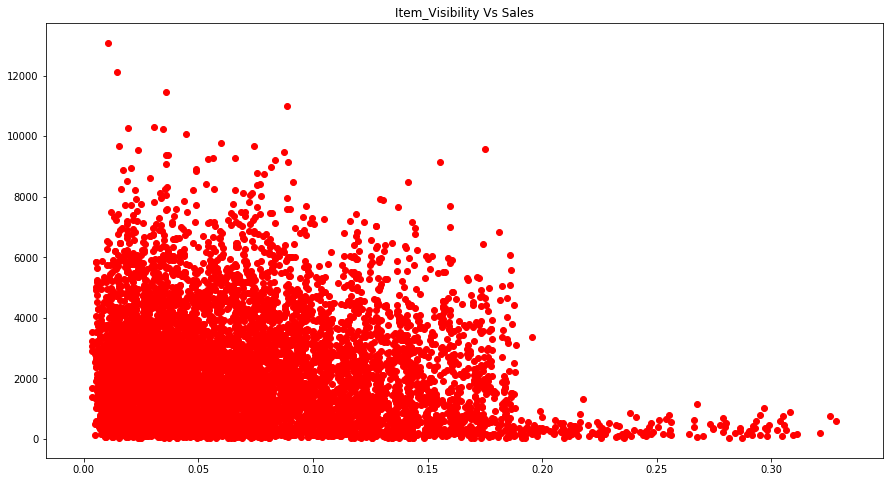

In [54]:
# Item_Visibility Vs Sales :

plt.scatter(combined.Item_Visibility, combined.Item_Outlet_Sales, c = "r")
plt.title("Item_Visibility Vs Sales")
plt.show()

In [55]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


In [56]:
# Item Type :

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [57]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Canned','Breads', 'Starchy Foods', 'Seafood']

# Function to covert it
def perish(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")
    
# Apply on Item_type
combined["ItemType_Cat"] = combined.Item_Type.apply(perish)

In [58]:
# Outlet Vintage :

combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [59]:
# Outlet_ID

def outlets(x):
    if(x =="OUT027"):
        return("OUT027")
    else:
        return("Others")
    
combined["Outlets"] = combined["Outlet_Identifier"].apply(outlets)

In [60]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ItemType_Cat,Vintage,Outlets
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishables,4,Others
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,Non Perishables,26,Others


In [61]:
# Item Identifier :

combined.iloc[0][0][:2]

'FD'

In [62]:
# Pattern from ItemID :

mylist = []
for i in combined.Item_Identifier:
    mylist.append(i[:2])
    
combined["ItemID_Cat"] = pd.Series(mylist)

In [63]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ItemType_Cat,Vintage,Outlets,ItemID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishables,4,Others,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052,Non Perishables,26,Others,NC


In [64]:
# Dropping the variables :

df = combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", 
                   "Outlet_Establishment_Year"], axis = 1)

In [65]:
df.head() # FD - Foods and DR - Drinks

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ItemType_Cat,Vintage,Outlets,ItemID_Cat
0,9.30,Low Fat,0.016047,249.8092,Small,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishables,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Small,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Low Fat,0.009780,53.8614,Small,Tier 3,Supermarket Type1,994.7052,Non Perishables,26,Others,NC


In [66]:
# Changing Item Fat Content as per the ItemID :

df.loc[df.ItemID_Cat=="NC", "Item_Fat_Content"]="Non Edible"

In [67]:
# Split the Data in Train and Test :

train.shape

(8523, 12)

In [68]:
# Splitting the Data in Train and Test :

newtrain = df[:8523]
newtest = df[8523:]

In [69]:
# Reset the Index :

newtest = newtest.reset_index()
newtest = newtest.drop(["index", "Item_Outlet_Sales"], axis = 1)

In [70]:
newtrain.shape, newtest.shape

((8523, 12), (5681, 11))

### Model Building

In [71]:
# Dummies :

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first= True)

In [72]:
# Validation Set comes from train set :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
ridge = Ridge(alpha = 0.5, normalize=True)
lasso = Lasso(alpha=0.5, normalize=True)

# Define x and y :

X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Def a Function that will return RMSE :

def rmse(y_test, pred):
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE: ", np.round(RMSE,4))
    
pred_lr = lr.fit(xtrain, ytrain).predict(xtest)
rmse(ytest, pred_lr)

RMSE:  1068.4442


In [73]:
# Building a Final Model :

lrreg = LinearRegression()
pred_l = lrreg.fit(X, y).predict(dummytest)

# Submission dataframe :

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":pred_l})

# Export the DF :

solution.to_csv("LR-Model.csv", index = False) # RMSE:

In [74]:
from sklearn.ensemble import BaggingRegressor

bagg = BaggingRegressor()

pred = bagg.fit(X, y).predict(dummytest)

In [75]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":pred})

solution.to_csv("Bagging Scaled.csv", index = False) # RMSE:1272

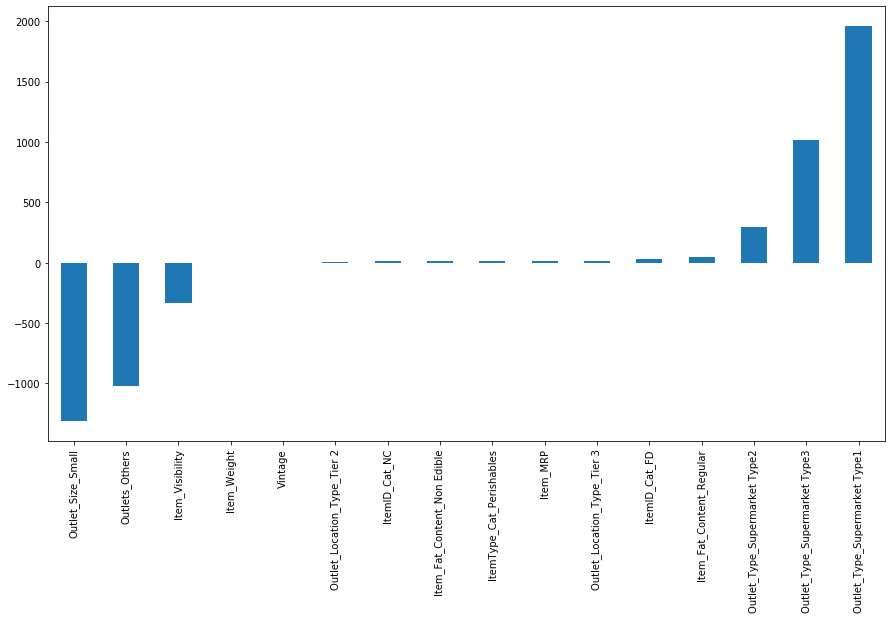

In [76]:
# Regression Coefficient :

pd.Series(lr.coef_, X.columns).sort_values().plot(kind = "bar")

### About Regularization

Some Predictors get high weightage in comparison to others. Hence, the model is overfitting when it comes to these features. It is not the correct thing because the model is not giving due importance to the other features and hence we need to introduce **Regularization**


Regularization will introduce a parameter called **alpha**. This is also called as Shrinkage Parameter. It will shrink the Parameters which have very high value and will normalize it.

There are 2 Regularization Techniques which are **L1** and **L2** Regularization and are popularly known as Lasso and Ridge Regression

### Lasso Regression

In [77]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# Predictor and Target :

X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Simple Model to see the effect on Train RMSE vs Test RMSE

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

lasso = Lasso(alpha = 1.0, normalize=True)
pred_train = lasso.fit(xtrain, ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain, ytrain).predict(xtest)

print("Train RMSE: ", np.sqrt(mean_squared_error(ytrain, pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(ytest, pred_test)))

Train RMSE:  1169.5031210990107
Test RMSE:  1090.3083445498125


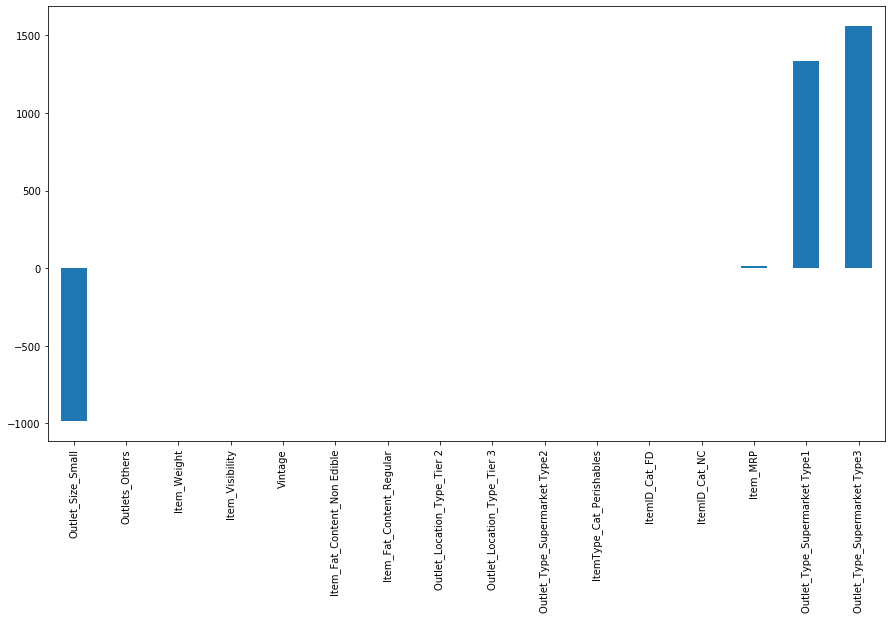

In [78]:
# Plot the Coefficients :

pd.Series(lasso.coef_, xtrain.columns).sort_values().plot(kind = "bar")

# As we decrease Alpha Value, coefficents are not restricted and most of the var are still 0

In [79]:
# Function that tells me which predictors are 0s basis alpha values

def lassos(alphas):
    # create a dataframe
    df = pd.DataFrame()
    
    #Names of the Columns/Predictors
    df["Features"] = xtrain.columns
    
    # Loop for all alphas
    for i in alphas:
        lasso = Lasso(alpha=i)
        lasso.fit(xtrain,ytrain)
        col_name = "Alpha = %f" % i
        df[col_name] = lasso.coef_
        
    return(df)

In [80]:
# [0.1, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10]
lassos([1, 2, 5, 10,20,30, 50])

# As you introduce more bias, the model simplfies but it will loose the prediction power

,Features,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000,Alpha = 30.000000,Alpha = 50.000000
0,Item_Weight,-1.063621,-1.026265,-9.199279e-01,-7.557533e-01,-3.395153e-01,-0.000000e+00,-0.000000e+00
1,Item_Visibility,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
2,Item_MRP,15.639831,15.640504,1.564207e+01,1.563848e+01,1.563153e+01,1.562485e+01,1.561269e+01
3,Vintage,-0.819140,-0.627538,-6.071922e-01,-5.843889e-01,-5.448509e-01,-4.993521e-01,-4.080031e-01
4,Item_Fat_Content_Non Edible,0.000000,0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,Item_Fat_Content_Regular,40.938364,38.149500,2.958232e+01,8.185023e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,Outlet_Size_Small,-1610.140766,-1600.851739,-1.553728e+03,-1.474795e+03,-1.316725e+03,-1.158842e+03,-8.429710e+02
7,Outlet_Location_Type_Tier 2,0.253886,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Outlet_Location_Type_Tier 3,6.933786,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Outlet_Type_Supermarket Type1,1955.341923,1937.105519,1.885168e+03,1.798500e+03,1.624825e+03,1.451141e+03,1.103691e+03


In [81]:
# Finding the RMSE and R2 Behavious basis different alphas :

from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
al =[]
r2=[]

alphas = [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]

for i in alphas:
    lasso = Lasso(alpha = i, normalize=True)
    al.append(i)
    pred_tr = lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test = lasso.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    r2.append(r2_score(ytest, pred_test))

In [82]:
lasso_df = pd.DataFrame({"Alpha":al, "RSq":r2, "Train_RMSE":rmse_train, "Test_RMSE": rmse_test})

In [83]:
lasso_df.sort_values(by = "RSq", ascending =False)

# Inf: As we introduce higher values of alpha, model complexity reduces.
# At the same time, the R2 Score reduces and Error increases. This is the point where
# prediction power gets compromised.

,Alpha,RSq,Train_RMSE,Test_RMSE
4,0.0900,0.580380,1143.871841,1067.948996
0,0.1000,0.580370,1143.930561,1067.962082
2,0.0200,0.580224,1143.606902,1068.147054
1,0.0100,0.580114,1143.584793,1068.287020
5,0.0010,0.580005,1143.577499,1068.425639
3,0.0005,0.579998,1143.577444,1068.434883
6,0.5000,0.576838,1150.402744,1072.446588
7,0.9900,0.563020,1169.001815,1089.816070
8,1.0000,0.562625,1169.503121,1090.308345
9,2.0000,0.500696,1242.768207,1164.943149


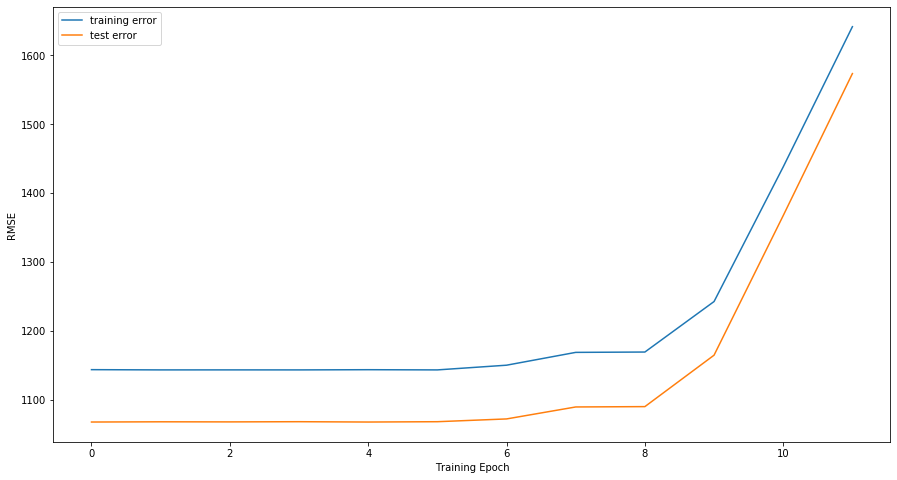

In [84]:
plt.plot(lasso_df.Train_RMSE, label = "training error")
plt.plot(lasso_df.Test_RMSE, label = "test error")
plt.xlabel("Training Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [85]:
# If test error is higher than training error
# you need to increase the test %age
# Apply CV to find the same...

# max_iter - how many times the model will run...
lassocv = LassoCV(cv=5, normalize=True,max_iter = 100000)

pred_tr = lassocv.fit(xtrain,ytrain).predict(xtrain)
pred_test = lassocv.fit(xtrain,ytrain).predict(xtest)

print("train error: ",(np.sqrt(mean_squared_error(ytrain, pred_tr))))
print("test error: ",np.sqrt(mean_squared_error(ytest, pred_test)))

train error:  1144.0483661969752
test error:  1067.9902576897161


In [86]:
lassocv.alpha_

0.11774847096562975

In [87]:
# alpha = 0.09 - Real Time Problem

lasso = Lasso(alpha=0.09,  normalize=True)
lasso.fit(X,y).predict(dummytest)

array([1789.70099904, 1522.7090981 , 1952.98920553, ..., 1945.9150962 ,
       3478.44718634, 1389.35279395])

* Seen the effect of different alpha values with Coefficients
* Saw the effect of Different alpha values with R2 Score and RMSE
* Applied LassoCV to find the same Alpha Value...

###  Ridge Regression

In [88]:
ridge = Ridge(alpha = 1.0, normalize=True)
pred_train = ridge.fit(xtrain, ytrain).predict(xtrain)
pred_test = ridge.fit(xtrain, ytrain).predict(xtest)

print("Train RMSE: ", np.sqrt(mean_squared_error(ytrain, pred_train)))
print("Test RMSE: ", np.sqrt(mean_squared_error(ytest, pred_test)))

Train RMSE:  1339.9589596946616
Test RMSE:  1262.3136402003865


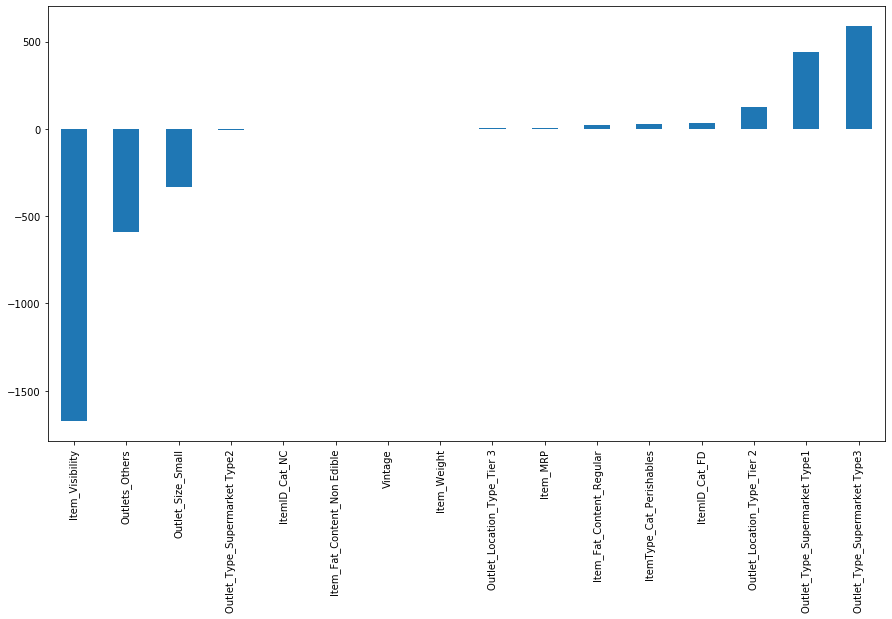

In [89]:
# Plot the Coefficients :

pd.Series(ridge.coef_, xtrain.columns).sort_values().plot(kind = "bar")

# As we decrease Alpha Value, coefficents are not restricted and most of the var are still 0

In [90]:
# Function that tells me which predictors are 0s basis alpha values

def ridges(alphas):
    # create a dataframe
    df = pd.DataFrame()
    
    #Names of the Columns/Predictors
    df["Features"] = xtrain.columns
    
    # Loop for all alphas
    for i in alphas:
        ridge= Ridge(alpha=i, normalize=True)
        ridge.fit(xtrain,ytrain)
        col_name = "Alpha = %f" % i
        df[col_name] = ridge.coef_
        
    return(df)

In [91]:
# [0.1, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10]
ridges([0.1,0.01, 0.5, 1, 2, 5, 10])

# As you introduce more bias, the model simplfies but it will loose the prediction power

,Features,Alpha = 0.100000,Alpha = 0.010000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000
0,Item_Weight,-0.930999,-1.246353,-0.050508,0.350370,0.515259,0.410310,0.264756
1,Item_Visibility,-1134.891077,-449.851234,-1801.534816,-1675.676002,-1291.250798,-720.093691,-409.496507
2,Item_MRP,14.209233,15.478432,10.410808,7.802106,5.196715,2.595377,1.414705
3,Vintage,-4.317229,-1.496825,-3.246953,-1.602696,-0.215536,0.558710,0.548138
4,Item_Fat_Content_Non Edible,8.331108,10.893936,1.846145,-1.830045,-4.368920,-4.641262,-3.411365
5,Item_Fat_Content_Regular,40.492865,44.716881,27.787769,19.951629,13.093883,6.828937,3.915111
6,Outlet_Size_Small,-785.897290,-980.411073,-469.020250,-333.889301,-222.947547,-118.960090,-68.933497
7,Outlet_Location_Type_Tier 2,65.509773,13.571448,135.581223,125.635771,91.178313,44.219364,22.291187
8,Outlet_Location_Type_Tier 3,22.735932,18.360285,8.161281,5.434802,8.020855,10.738581,9.117871
9,Outlet_Type_Supermarket Type1,1451.831903,1891.879379,719.480007,438.448750,240.636127,96.067434,45.516036


In [92]:
# Finding the RMSE and R2 Behavious basis different alphas
from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
al =[]
r2=[]

alphas = [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]

for i in alphas:
    ridge = Ridge(alpha = i, normalize=True)
    al.append(i)
    pred_tr = ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test = ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    r2.append(r2_score(ytest, pred_test))

In [93]:
ridge_df = pd.DataFrame({"Alpha":al, "RSq":r2, "Train_RMSE":rmse_train, "Test_RMSE": rmse_test})

In [94]:
ridge_df.sort_values(by = "RSq", ascending =False)

# Inf: As we introduce higher values of alpha, model complexity reduces.
# At the same time, the R2 Score reduces and Error increases. This is the point where
# prediction power gets compromised.

,Alpha,RSq,Train_RMSE,Test_RMSE
2,0.0200,0.580381,1144.377374,1067.947270
1,0.0100,0.580370,1143.789921,1067.961214
5,0.0010,0.580047,1143.579677,1068.372136
3,0.0005,0.580019,1143.577991,1068.407452
4,0.0900,0.574081,1154.896164,1075.933896
0,0.1000,0.572619,1156.947875,1077.779004
6,0.5000,0.495541,1250.688407,1170.941119
7,0.9900,0.415144,1338.485913,1260.801987
8,1.0000,0.413741,1339.958960,1262.313640
9,2.0000,0.307866,1446.331438,1371.568076


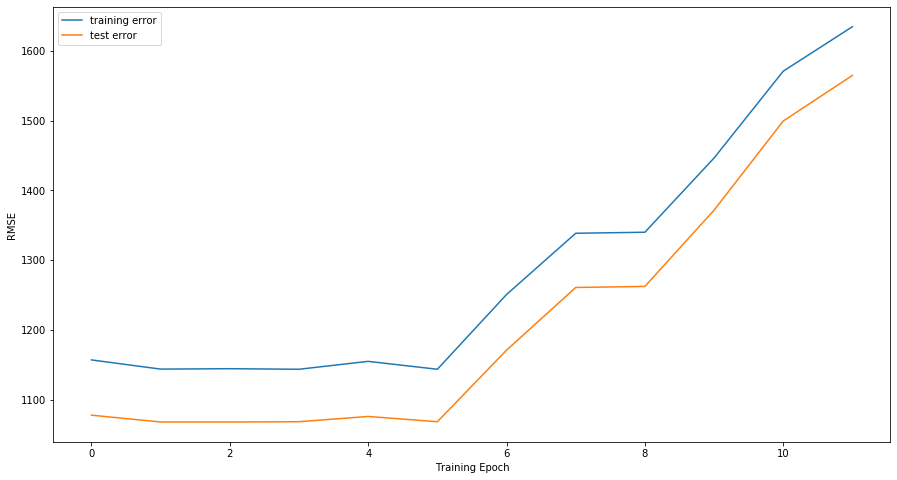

In [95]:
plt.plot(ridge_df.Train_RMSE, label = "training error")
plt.plot(ridge_df.Test_RMSE, label = "test error")
plt.xlabel("Training Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [96]:
# If test error is higher than training error
# you need to increase the test %age
# Apply CV to find the same...

# max_iter - how many times the model will run...
ridgecv = RidgeCV(cv=10, normalize=True)

pred_tr = ridgecv.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridgecv.fit(xtrain,ytrain).predict(xtest)

print("train error: ",(np.sqrt(mean_squared_error(ytrain, pred_tr))))
print("test error: ",np.sqrt(mean_squared_error(ytest, pred_test)))

train error:  1156.9478754534744
test error:  1077.7790043729412


In [97]:
ridgecv.alpha_

0.1

In [98]:
# alpha = 0.09 - Real Time Problem

lasso = Lasso(alpha=0.09,  normalize=True)
lasso.fit(X,y).predict(dummytest)

array([1789.70099904, 1522.7090981 , 1952.98920553, ..., 1945.9150962 ,
       3478.44718634, 1389.35279395])

In [99]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.00001, normalize=True, max_iter=10000)
pred_tr = enet.fit(xtrain,ytrain).predict(xtrain)
pred_test = enet.fit(xtrain,ytrain).predict(xtest)

print("train error: ",(np.sqrt(mean_squared_error(ytrain, pred_tr))))
print("test error: ",np.sqrt(mean_squared_error(ytest, pred_test)))

train error:  1145.7215518047722
test error:  1068.5753581688168


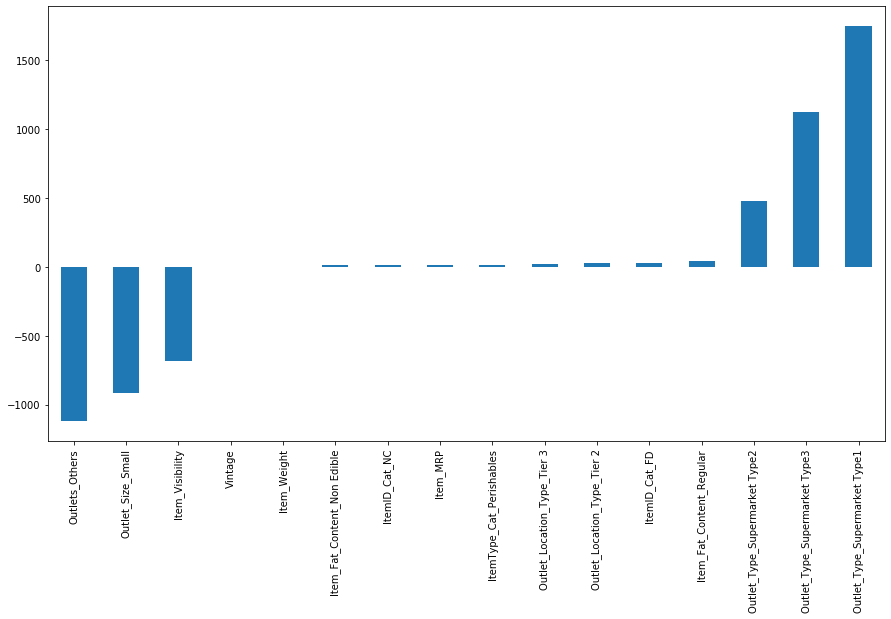

In [100]:
pd.Series(enet.coef_, xtrain.columns).sort_values().plot(kind = "bar")

In [101]:
from sklearn.model_selection import GridSearchCV
alphas = [{'alpha':[0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]}]
grid =GridSearchCV(estimator = Ridge(normalize=True), param_grid= alphas, cv = 10)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5,
                                    0.99, 1, 2, 5, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [102]:
grid.best_params_

{'alpha': 0.001}